In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing dataset
beml_df=pd.read_csv(r"C:\Users\Akshay Yadav\Downloads\Data Science\BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo_df=pd.read_csv(r"C:\Users\Akshay Yadav\Downloads\Data Science\GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
#We are only selecting data & close column so using indexing
beml_df=beml_df[["Date","Close"]]
glaxo_df=glaxo_df[["Date","Close"]]

In [6]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [7]:
beml_df.dtypes

#Observation: Here data column is in object type so it python will give string error so we need to convert it into date time

Date      object
Close    float64
dtype: object

In [8]:
#rows will be sorted by time in ascending order
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df["Date"]))
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))

In [9]:
beml_df


glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


# Visualization 

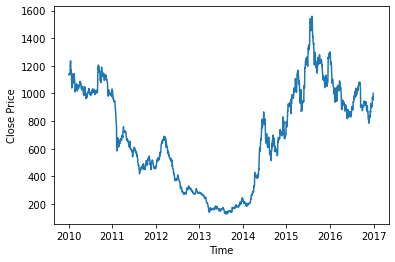

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(beml_df.Close);
plt.xlabel("Time");
plt.ylabel("Close Price");

#Observation: compared to glaxo beml is not that stable.

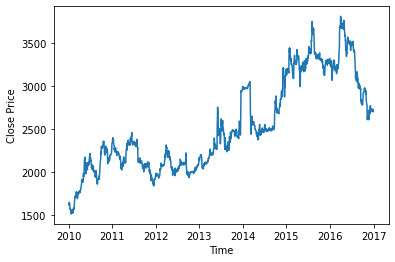

In [11]:
plt.plot(glaxo_df.Close);
plt.xlabel("Time");
plt.ylabel("Close Price");

#Obs: Glaxo is stable .

In [14]:
#Adding "Gain" column so it will be easy to solve the problem
beml_df['gain']=beml_df.Close.pct_change(periods=1)
glaxo_df['gain']=glaxo_df.Close.pct_change(periods=1)

In [16]:
beml_df
glaxo_df

#Obs: we have added new column gain 

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [17]:
#Dropping first column as it is NAN value
beml_df=beml_df.dropna()
glaxo_df=glaxo_df.dropna()

In [19]:
beml_df
glaxo_df

#Obs: NAN value row is been deleted

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


Text(0.5, 1.0, 'Gain over time-beml')

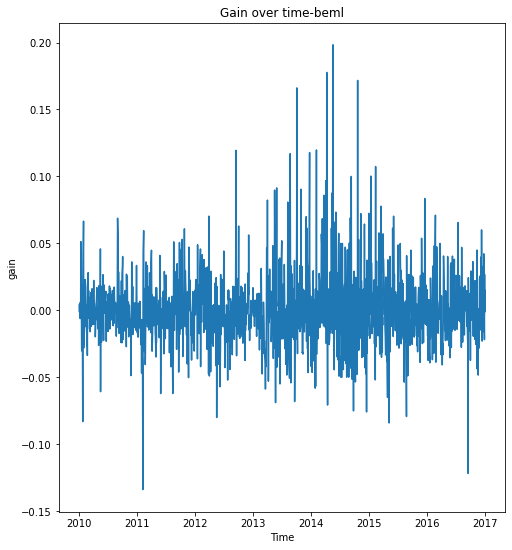

In [22]:
#Visualization
plt.figure(figsize=(8,9))
plt.plot(beml_df.index,beml_df.gain);
plt.xlabel("Time");
plt.ylabel("gain")
plt.title("Gain over time-beml")

Text(0.5, 1.0, 'Gain over time-glaxo')

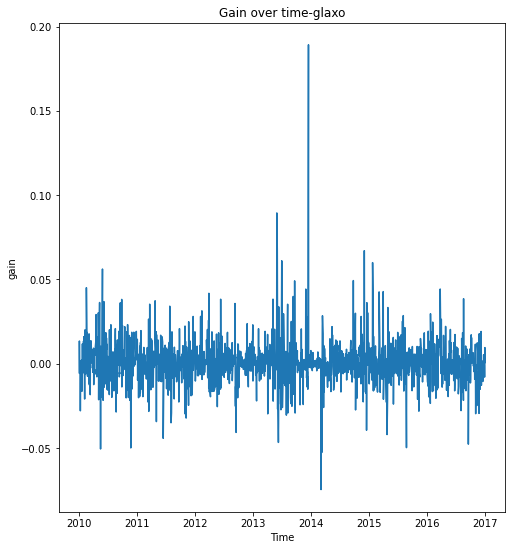

In [23]:
plt.figure(figsize=(8,9))
plt.plot(glaxo_df.index,glaxo_df.gain);
plt.xlabel("Time");
plt.ylabel("gain")
plt.title("Gain over time-glaxo")

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


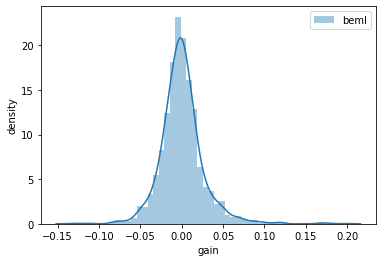

In [25]:
sns.distplot(beml_df.gain,label="beml");
plt.xlabel("gain");
plt.ylabel("density");
plt.legend()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


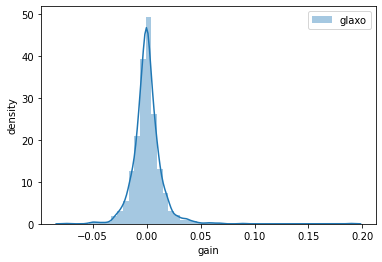

In [31]:
sns.distplot(glaxo_df.gain,label="glaxo");
plt.xlabel("gain");
plt.ylabel("density");
plt.legend()

#Obs: Glaxo peak is sharp so it's more stable thane BEML.

In [34]:
print("For BEML:")
print("Mean:",round(beml_df.gain.mean(),4))
print("Std:", round(beml_df.gain.std(),4))

For BEML:
Mean: 0.0003
Std: 0.0264


In [36]:
print("For GLAXO:")
print("Mean:",round(glaxo_df.gain.mean(),4))
print("Std:", round(glaxo_df.gain.std(),4))

#Obs: Glaxo is more stable and it has less flunctuation and high mean so it's better to opt for Glaxo instead of Beml.

For GLAXO:
Mean: 0.0004
Std: 0.0134
